Link de la presentación: https://docs.google.com/presentation/d/1jD4QjDbZHns5Ie5EGqAFeroEfF4Px1Gwj-RlbQ3CyBo/edit#slide=id.g231078c86ee_0_48

Desarrollar un modelo de regresión que permita predecir el precio por metro cuadrado de una propiedad. El objetivo final es que el
modelo que desarrollen sea utilizado como tasador automático a ser aplicados a las próximas propiedades que sean comercializadas por la
empresa.

1) Efectuar una limpieza del dataset provisto. Particularmente, deberá
diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

In [16]:
# Importamos librerías
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
from re import sub 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (6, 4), 'figure.dpi': 120})
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import

In [27]:
df = pd.read_csv('ds_properati.csv')
df.shape

(121220, 26)

In [ ]:
# Superficie total que tiene como mínimo el 10% más que los otros: 
df["surface_total_in_m2"].quantile(0.9)

In [ ]:
df["surface_total_in_m2"].quantile(0.1)

In [ ]:
df["price"].quantile(0.9)

In [ ]:
df["price"].quantile(0.1)

2) Realizar un análisis descriptivo de las principales variables.

3) Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

In [28]:
# Rename de columnas vacías:
df.rename( columns={"Unnamed: 0" : "indice"}, inplace=True)
df.head

<bound method NDFrame.head of         indice operation property_type       place_name  \
0            0      sell            PH        Mataderos   
1            1      sell     apartment         La Plata   
2            2      sell     apartment        Mataderos   
3            3      sell            PH          Liniers   
4            4      sell     apartment           Centro   
...        ...       ...           ...              ...   
121215  121215      sell     apartment         Belgrano   
121216  121216      sell         house           Beccar   
121217  121217      sell     apartment    Villa Urquiza   
121218  121218      sell     apartment      Plaza Colón   
121219  121219      sell     apartment  Capital Federal   

                                  place_with_parent_names country_name  \
0                   |Argentina|Capital Federal|Mataderos|    Argentina   
1             |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2                   |Argentina|Capital 

In [ ]:
df.fillna(0, inplace=True)

In [38]:
# Elimino columnas innecesarias
df_filt = df.drop(['indice', 'operation', 'country_name', 'currency', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price_aprox_local_currency', 'price_per_m2', 'properati_url', 'description', 'title', 'image_thumbnail', 'surface_covered_in_m2', 'property_type', 'place_name', 'place_with_parent_names', 'state_name', 'price_aprox_usd', 'expenses'], axis='columns')
df_filt.head(2)

,price,surface_total_in_m2,price_usd_per_m2,floor,rooms
0,62000.0,55.0,1127.272727,0.0,0.0
1,150000.0,0.0,0.000000,0.0,0.0


In [42]:
df_filt = df_filt[(df_filt["surface_total_in_m2"] > 30) & (df_filt["surface_total_in_m2"] < 600) & (df_filt["price"] > 30000) & (df_filt["price"] < 2000000)]
df_filt

,price,surface_total_in_m2,price_usd_per_m2,floor,rooms
0,62000.0,55.0,1127.272727,0.0,0.0
2,72000.0,55.0,1309.090909,0.0,0.0
4,64000.0,35.0,1828.571429,0.0,0.0
6,130000.0,106.0,1226.415094,0.0,0.0
7,138000.0,45.0,3066.666667,0.0,0.0
...,...,...,...,...,...
121215,870000.0,113.0,7699.115044,0.0,0.0
121216,498000.0,360.0,1383.333333,0.0,0.0
121217,131500.0,46.0,2858.695652,0.0,0.0
121218,95900.0,48.0,1997.916667,0.0,0.0


<AxesSubplot:>

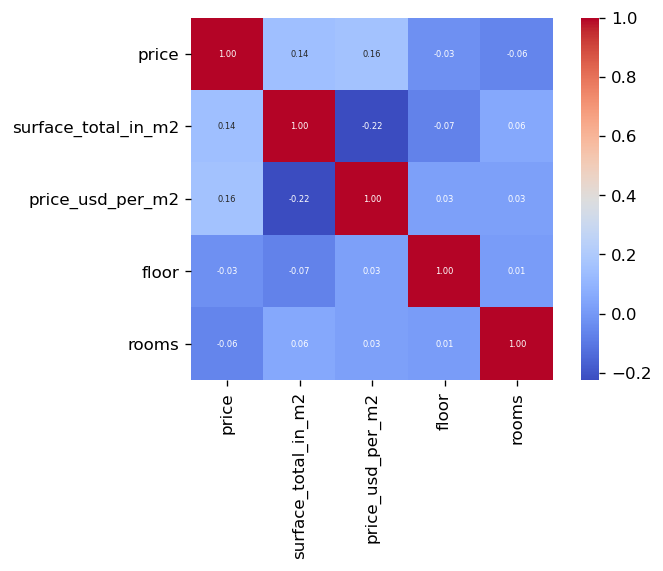

In [43]:
# Verifico la relación de las variables
corr = df_filt.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 5}, cmap = 'coolwarm')

## Gráficos

c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface_total_in_m2'>

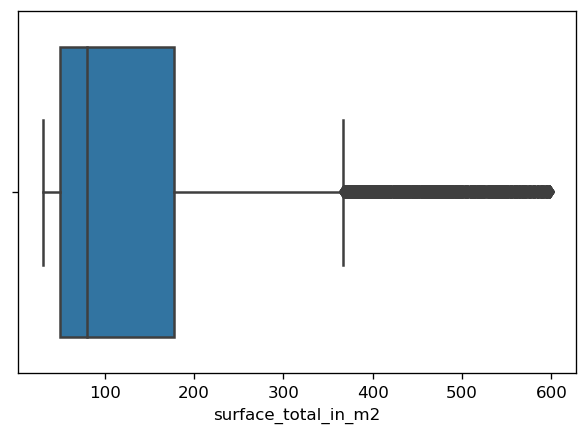

In [49]:
#Box Plot
sns.boxplot(df_filt['surface_total_in_m2'])  

c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

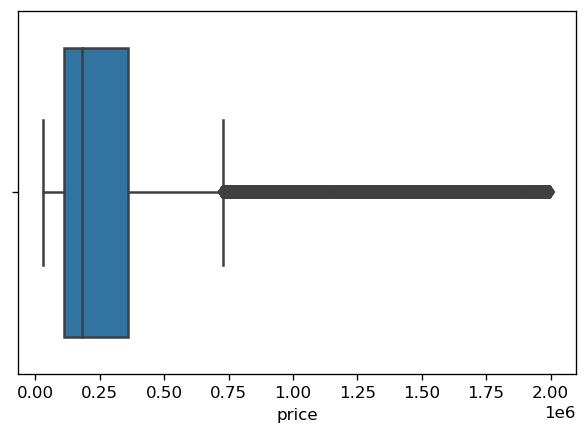

In [50]:
# Box Plot
sns.boxplot(df_filt['price'])

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400')])

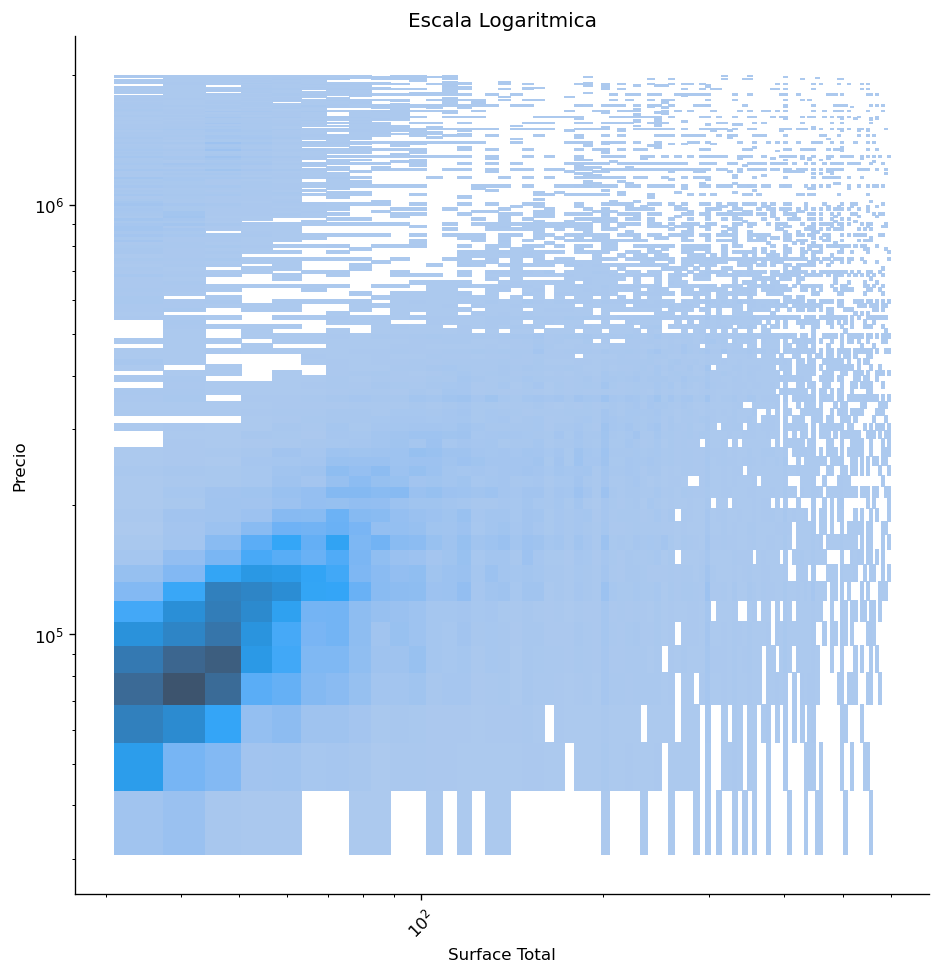

In [100]:
plt.rcParams.update({'figure.figsize': (10, 8), 'figure.dpi': 120})
figure = sns.displot(data=df_filt, x='surface_total_in_m2', y="price", height=8 ) 
plt.title("Escala Logaritmica")
plt.xlabel("Surface Total")
plt.ylabel("Precio")
plt.xscale('log')
plt.yscale('log')
plt.xticks(rotation=45)



<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price'>

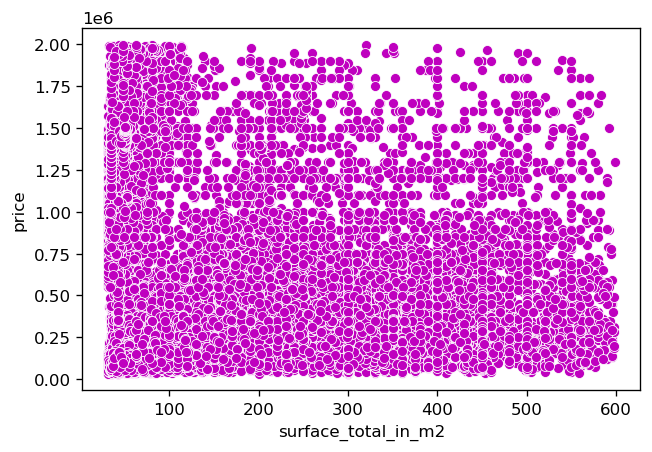

In [51]:
#sns.set_theme(style="darkgrid")        
sns.scatterplot(data=df_filt, x="surface_total_in_m2", y="price", color="m")

## Aplicando el modelo de regresión 

In [52]:
# Seleccionamos las variables predictoras
X = df_filt[["surface_total_in_m2", "floor", "rooms"]] 
# Defino el Target
y = df_filt.price
# Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Generamos el Modelo de Regresión Lineal
linear_model = LinearRegression()
# Fiteo el modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [53]:
#Evaluamos el modelo
for i, model in enumerate ([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)

    #print(f'Modelo benchmark: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    print(f'Raiz del error cuadratico medio en test: {rmse_test}')

Raiz del error cuadratico medio en train: 384991.71980239736
Raiz del error cuadratico medio en test: 388195.89230383676


In [54]:
# Predicción del precio:
new_data = pd.DataFrame({'surface_total_in_m2': [100],'floor': [3], 'rooms': [2]})
prediction = model.predict(new_data)
print("Prediction Price:", prediction[0])

Prediction: 291706.93634753954


### Verificación del precio (predicho) obtenido con el precio del dataframe:

In [55]:
dato_filtrado = df[(df.surface_total_in_m2 >= 100) & (df.floor <= 3) & (df.rooms <=2 )]
dato_filtrado['price']

6         130000.0
10         70000.0
15        250000.0
18        570000.0
20             0.0
            ...   
121212         0.0
121213         0.0
121214         0.0
121215    870000.0
121216    498000.0
Name: price, Length: 25600, dtype: float64

In [87]:
dato_filtrado.dtypes

indice                          int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

## Análisis de la Competencia

In [66]:
url = 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-1'

list_pages = []
for i in range(1,70):
    url_list = url.replace("1", str(i)) 
    list_pages.append(url_list)
    #print(url_list)
list_pages

['https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-1',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-2',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-3',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-4',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-5',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-6',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-7',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-8',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-9',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-10',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-11',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-12',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-13',
 'https://www.argenprop.com/inmuebles-venta-pais-argentina-pagina-14',
 'https://www.a

In [67]:
def conjunto_pages(list_pages):
    urls = []
    for url in list_pages:
        # Extraemos las URLs
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Pedimos las etiquetas que contengan las URLs
        links = soup.find_all('a')

        for link in links:
            if link.get('href')[0:5]=="/depa" or link.get('href')[0:5]=="/casa":
                urls.append('https://www.argenprop.com' + link.get('href'))
    return urls     
total_pages = conjunto_pages(list_pages)
print(len(total_pages))

1323


In [70]:
def valor_numerico (regEx, text):
    lista_resultados = re.findall(regEx, text)
    if len(lista_resultados) == 1:
        resultado = lista_resultados[0]
    else:
        resultado = 0        
    return resultado    

def extraccion (url):
    matches = []
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    datos_inmueble = soup.find_all('div', {'class':'desktop'})

    if soup.find('li', {'title':'Sup. cubierta'}):
        metros_cubiertos_html = soup.find('li', {'title':'Sup. cubierta'})
        metros_cubiertos = valor_numerico("([0-9]+)\s" ,metros_cubiertos_html.find('div', {'class':'desktop'}).text)
    else:
        metros_cubiertos = 0
    matches.append(metros_cubiertos)

    if soup.find('li', {'title':'Dormitorios'}):
        dormitorios_html = soup.find('li', {'title':'Dormitorios'})
        dormitorios = valor_numerico("([0-9]+)\s" ,dormitorios_html.find('div', {'class':'desktop'}).text)
    else:
        dormitorios = 0
    matches.append(dormitorios)

    if soup.find('li', {'title':'Antiguedad'}):
        antiguedad_html = soup.find('li', {'title':'Antiguedad'})
        antiguedad = valor_numerico("([0-9]+)\s" , antiguedad_html.find('div', {'class':'desktop'}).text)
    else:
        antiguedad = 0
    matches.append(antiguedad)
    
    if soup.find('li', {'title':'Ba&#xF1;os'}):
        banios_html = soup.find('li', {'title':'Ba&#xF1;os'})
        banios = valor_numerico("([0-9]+)\s" ,banios_html.find('div', {'class':'desktop'}).text)
    else:
        banios = 0
    matches.append(banios)

    if soup.find('li', {'title':'Ambientes'}):
        ambientes_html = soup.find('li', {'title':'Ambientes'})
        ambientes = valor_numerico("([0-9]+)\s" ,ambientes_html.find('div', {'class':'desktop'}).text)
    else:
        ambientes = 0
    matches.append(ambientes)
# "(.?)\s*d" 
    datos = soup.find('input', {'id':'ga-dimension-ficha'})

    if datos['data-barrio']:
        matches.append(datos['data-barrio'])
    else:
        matches.append(0)

    if datos['data-moneda']:
        matches.append(datos['data-moneda'])
    else:
        matches.append('USD')

    if datos['data-price']:
        matches.append(datos['data-price'])
    else:
        matches.append(0)

    return matches      
extraccion(total_pages[10])  

['140', '2', '8', 0, '3', 'Belgrano', 'USD', '445000']

In [72]:
# Creamos un dataframe
df_web = pd.DataFrame(columns=['metros_cubiertos', 'dormitorios', 'antiguedad','banios', 'ambientes', 'barrio', 'moneda', 'precio'])    

In [74]:
# Llenamos el dataframe con los links 
for link in total_pages:
    lista = extraccion(link) 
    #print(len(lista))
    df_web.loc[len(df_web)] = lista

In [75]:
df_web_filt = df_web.drop(['barrio', 'moneda', 'banios'], axis=1)
df_web_filt = df_web_filt.astype(float)
df_web_filt

,metros_cubiertos,dormitorios,antiguedad,ambientes,precio
0,115.0,2.0,14.0,3.0,320000.0
1,290.0,3.0,40.0,4.0,395000.0
2,135.0,3.0,40.0,5.0,285000.0
3,145.0,3.0,30.0,4.0,350000.0
4,55.0,2.0,30.0,3.0,115000.0
...,...,...,...,...,...
1318,37.0,1.0,48.0,2.0,58900.0
1319,65.0,2.0,0.0,3.0,48000.0
1320,50.0,2.0,0.0,3.0,98000.0
1321,70.0,2.0,0.0,3.0,188000.0


In [76]:
df_web_filt.to_csv('ds_web_p2.csv', header=True)

In [77]:
df2_reduc = pd.read_csv('ds_web_p2.csv')
df2_reduc.shape

(1323, 6)

<AxesSubplot:>

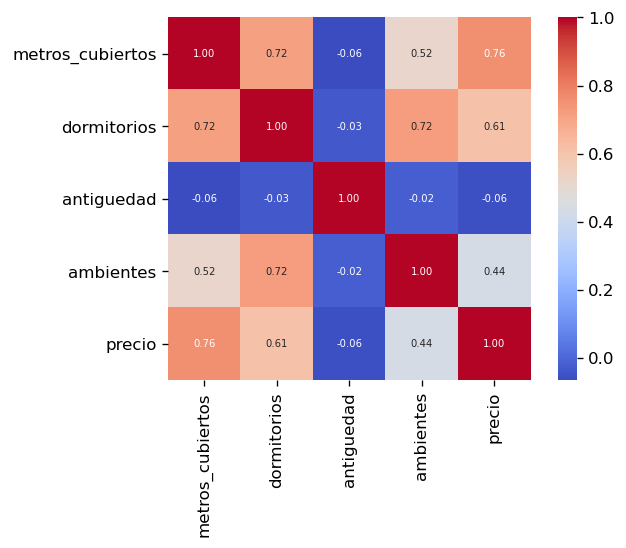

In [80]:
corr = df_web_filt.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 6}, cmap = 'coolwarm')

### Predección del costo de un inmueble a partir de sus características: m2, nros baños, pisos.

In [81]:
# Aplicando el modelo de regresión 
# Seleccionamos las variables predictoras
X = df_web_filt[["metros_cubiertos", "dormitorios", 'antiguedad', "ambientes"]] 
# Defino el Target
y = df_web_filt.precio
# Separo en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Generamos el Modelo de Regresión Lineal
modelo_lineal = LinearRegression()
# Fiteo el modelo
modelo_lineal.fit(X_train, y_train)

LinearRegression()

In [82]:
#Evaluamos el modelo
for i, model in enumerate ([modelo_lineal]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict (X_test)

    #print(f'Modelo benchmark: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    #print(f'Raiz del error cuadratico medio en train: {rmse_train}')
    #print(f'Raiz del error cuadratico medio en test: {rmse_test}')

In [83]:

nuevo_dato = pd.DataFrame({'metros_cubiertos': [100],"dormitorios":[1], 'antiguedad': [2], 'ambientes': [3]})
prediccion = model.predict(nuevo_dato)
print("Predicción del precio del inmueble:", prediccion[0])

Predicción del precio del inmueble: 188394.7776963416


In [86]:
df_web.dtypes

metros_cubiertos    object
dormitorios         object
antiguedad          object
banios              object
ambientes           object
barrio              object
moneda              object
precio              object
dtype: object

In [92]:
df_web['metros_cubiertos'] = df_web['metros_cubiertos'].astype('float64')
df_web['dormitorios'] = df_web['dormitorios'].astype('float64')
df_web['antiguedad'] = df_web['antiguedad'].astype('float64')
df_web['ambientes'] = df_web['ambientes'].astype('float64')
df_web['precio'] = df_web['precio'].astype('float64')


In [93]:
dato_filtrado_web = df_web[(df_web.metros_cubiertos <= 100) & (df_web.dormitorios <= 2) & (df_web.antiguedad <=2) & (df_web.ambientes <=2)]
dato_filtrado_web

,metros_cubiertos,dormitorios,antiguedad,banios,ambientes,barrio,moneda,precio,Salary
5,45.0,0.0,0.0,0,1.0,Palermo,USD,113000.0,113000.0
25,66.0,1.0,1.0,0,2.0,Palermo,USD,165000.0,165000.0
26,49.0,1.0,1.0,0,2.0,Palermo,USD,156000.0,156000.0
28,30.0,0.0,1.0,0,1.0,Palermo,USD,87500.0,87500.0
39,48.0,1.0,0.0,0,2.0,Palermo,USD,147999.0,147999.0
...,...,...,...,...,...,...,...,...,...
1302,39.0,0.0,0.0,0,1.0,San Telmo,USD,85000.0,85000.0
1306,0.0,0.0,0.0,0,1.0,0,USD,28000.0,28000.0
1310,50.0,1.0,0.0,0,2.0,Villa Urquiza,USD,155000.0,155000.0
1312,50.0,0.0,0.0,0,1.0,Palermo,USD,130000.0,130000.0


### Verificación del dataset y datos extraídos de la web de la competencia